# Задание
Fat.csv
Провести предварительный анализ данных.
Создать наилучшую модель для прогнозирования жировой массы тела.
Произвести анализ модели.

Life Expectancy.csv
Провести предварительный анализ данных.
Объяснить ожидаемую продолжительность жизни женщин через ожидаемую продолжительность жизни мужчин.
Исследовать использование показателя "Births/Woman" в стране для прогнозирования "Life Expectancy".
Произвести анализ модели.

Сдать отчёт формате .ipynb или .py (выводы оформлять в виде многострочного комментария после соответствующей строки) в папку "Работы 15.11" до 14:30. В противном случае вы получите максимально 6 баллов за выполнение практического задания.

Максимальные баллы:
Кто пришел и сдал вовремя = 10
Кто сдаст позже = 6
Кто не пришел без причины = 2
Кто не пришел по уважительной делает в сл раз другие задания = 10
Кто сдал похожие работы = 2 обоим

In [169]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis, shapiro, chisquare, gaussian_kde, kstest, ttest_ind, spearmanr
from statistics import correlation
from scipy import stats

In [124]:
fat_df = pd.read_csv('Fat.csv', sep=';')
life_expectancny_df = pd.read_csv('Life Expectancy.csv', sep=';')

In [17]:
fat_df.head()

,Body Fat,Waist,Weight
0,6,"81,28","79,379"
1,21,"91,44","82,1"
2,15,"96,52","90,719"
3,6,"83,82","72,121"
4,22,"99,06","88,904"


In [18]:
fat_df.columns

Index(['Body Fat', 'Waist', 'Weight'], dtype='object')

In [22]:
fat_df = fat_df.rename(columns={'Body Fat' : 'body_fat', 'Waist' : 'waist', 'Weight' : 'weight'})
fat_df['waist'] = fat_df['waist'].str.replace(",", ".").astype(float)
fat_df['weight'] = fat_df['weight'].str.replace(",", ".").astype(float)
fat_df

,body_fat,waist,weight
0,6,81.28,79.379
1,21,91.44,82.100
2,15,96.52,90.719
3,6,83.82,72.121
4,22,99.06,88.904
5,31,101.60,87.090
6,32,104.14,92.987
7,21,88.90,78.472
8,25,96.52,84.822
9,30,96.52,85.275


В данном случае задача классификации. Мы предсказываем зависимую переменную body_fat на основе независимых переменных waist и weight. Переобозначим переменные Y = body_fat, X = {waist, weight}

In [114]:
y = fat_df.body_fat
X = fat_df[['waist', 'weight']]

Разделим выборку на обущающую и тестовую

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
n_neighbors = 2
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test).astype(int)
accuracy_score = sum((y_pred==y_test).astype(float)) / y_test.size
accuracy_score

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score = sum((y_pred==y_test).astype(float)) / y_test.size
accuracy_score

0.0

kNN лучше показал себя, чем дерево решений для предсказания класса

In [127]:
life_expectancny_df.head()

,Country,Births/Woman,Life Expectancy,Female,Male
0,Sweden,"1,54","79,97","82,78","77,31"
1,Australia,"1,76","80,13","83,13","77,27"
2,Italy,"1,26","79,4","82,52","76,47"
3,Canada,"1,61","79,83","83,38","76,44"
4,Greece,"1,35","78,89","81,65","76,32"


In [128]:
life_expectancny_df = life_expectancny_df.rename(columns={'Country' : 'country', 'Births/Woman' : 'bd_woman', 'Life Expectancy' : 'life_expectancy', 'Male' : 'male', 'Female': 'female'})
life_expectancny_df['bd_woman'] = life_expectancny_df['bd_woman'].str.replace(",", ".").astype(float)
life_expectancny_df['life_expectancy'] = life_expectancny_df['life_expectancy'].str.replace(",", ".").astype(float)
life_expectancny_df['female'] = life_expectancny_df['female'].str.replace(",", ".").astype(float)
life_expectancny_df['male'] = life_expectancny_df['male'].str.replace(",", ".").astype(float)
life_expectancny_df

,country,bd_woman,life_expectancy,female,male
0,Sweden,1.54,79.97,82.78,77.31
1,Australia,1.76,80.13,83.13,77.27
2,Italy,1.26,79.40,82.52,76.47
3,Canada,1.61,79.83,83.38,76.44
4,Greece,1.35,78.89,81.65,76.32
5,Spain,1.26,79.23,82.80,75.87
6,Netherlands,1.65,78.74,81.76,75.85
7,UK,1.66,78.16,80.70,75.74
8,France,1.85,79.28,83.11,75.63
9,Germany,1.37,78.42,81.55,75.46


Объяснить ожидаемую продолжительность жизни женщин через ожидаемую продолжительность жизни мужчин.

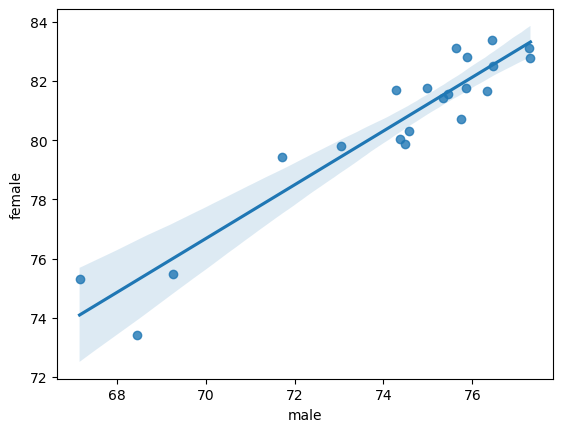

In [170]:
sns.regplot(
    x='male', 
    y='female', 
    data=life_expectancny_df)
None

In [173]:
expected = norm(loc=life_expectancny_df['male'].mean(), scale=life_expectancny_df[['male']].std()).rvs(size=life_expectancny_df[['bd_woman']].size)
ks_test = kstest(life_expectancny_df['male'], expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.6028129403170835


In [171]:
corr = correlation(life_expectancny_df['female'], life_expectancny_df['male'])
print('pearson correlation coefficient: ' + str(corr))
ttest_result = stats.ttest_ind(life_expectancny_df['female'], life_expectancny_df['male'])
print('T-test P-value: ' + str(ttest_result.pvalue))

pearson correlation coefficient: 0.9477096744291083
T-test P-value: 7.004357980472583e-09


Исследовать использование показателя "Births/Woman" в стране для прогнозирования "Life Expectancy". Произвести анализ модели.

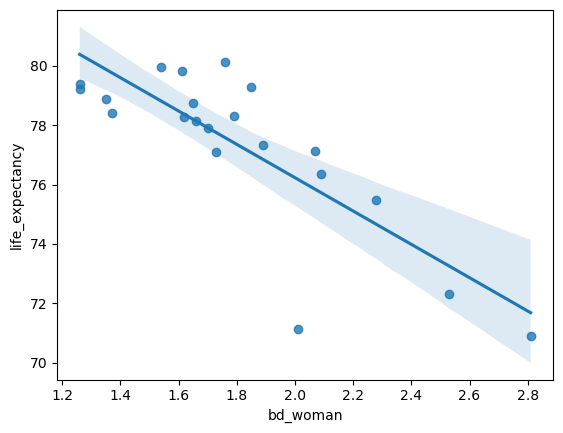

In [143]:
sns.regplot(
    x='bd_woman', 
    y='life_expectancy', 
    data=life_expectancny_df)
None

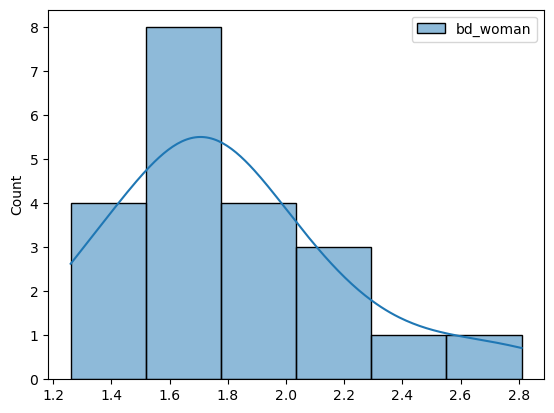

In [145]:
sns.histplot(data=life_expectancny_df[['bd_woman']], kde=True)
None

In [153]:
expected = norm(loc=life_expectancny_df['bd_woman'].mean(), scale=life_expectancny_df[['bd_woman']].std()).rvs(size=life_expectancny_df[['bd_woman']].size)
ks_test = kstest(life_expectancny_df['bd_woman'], expected)
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))

Kolmogorov-Smirnov test: 0.36497950870925666


In [158]:
corr = correlation(life_expectancny_df['bd_woman'], life_expectancny_df['life_expectancy'])
print('pearson correlation coefficient: ' + str(corr))
ttest_result = stats.ttest_ind(life_expectancny_df['bd_woman'], life_expectancny_df['life_expectancy'])
print('T-test P-value: ' + str(ttest_result.pvalue))

pearson correlation coefficient: -0.8124129425649304
T-test P-value: 1.9493779197320366e-53


In [159]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=life_expectancny_df[['life_expectancy']]
X=life_expectancny_df[['bd_woman']]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     36.88
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           7.69e-06
Time:                        14:14:24   Log-Likelihood:                -39.192
No. Observations:                  21   AIC:                             82.38
Df Residuals:                      19   BIC:                             84.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.4679      1.704     51.316      0.000      83.900      91.035
bd_woman      -5.6177      0.925     -6.073      0.000      -7.554      -3.682
==============================================================================
Omnibus:                       12.944   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.489
Skew:                          -1.251   Prob(JB):                      0.00194
Kurtosis:                       5.831   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

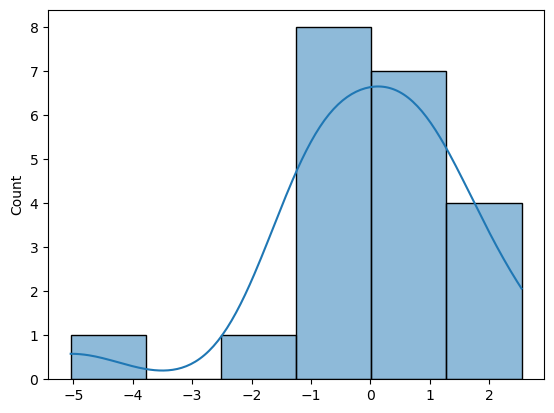

In [162]:
linreg = LinearRegression()
linreg.fit(X, y)
predicted_values = linreg.predict(X)
residuals = (y.to_numpy().T - predicted_values.T).T
sns.histplot(data=pd.Series(residuals.T[0]), kde=True)
None

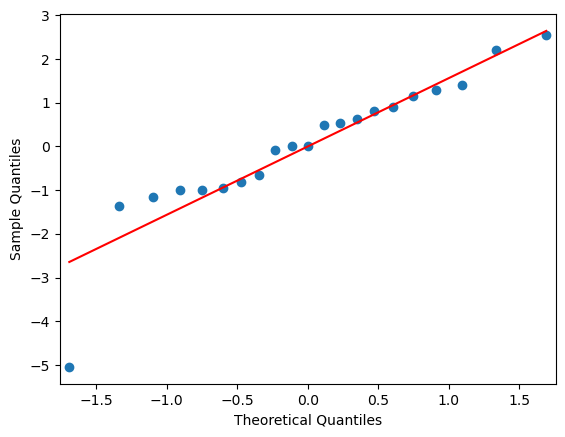

In [174]:
fig = sm.qqplot(pd.Series(residuals.T[0]), line='s')
plt.show()

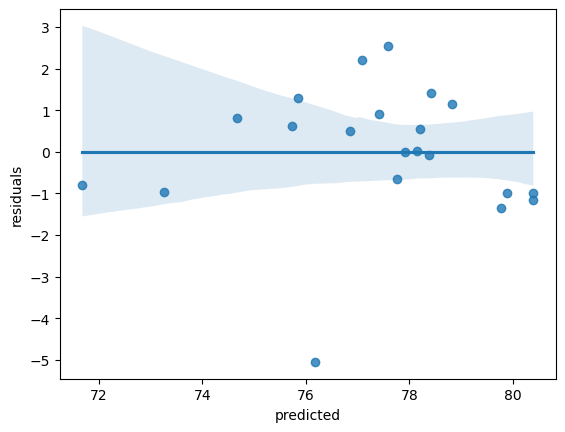

In [165]:
predicted_residuals = pd.concat([pd.Series(data=residuals.T[0]), 
                                              pd.Series(data=predicted_values.T[0])], axis=1,
                               keys= ['residuals', 'predicted'])

sns.regplot(
    x='predicted', 
    y='residuals', 
    data=predicted_residuals)
None

In [167]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('life_expectancy ~ bd_woman', data=life_expectancny_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
bd_woman,99.737689,1.0,36.884784,0.000008
Residual,51.376635,19.0,NaN,NaN


Дисперсионный анализ сведетельствует в пользу того, что модель лучше наивного прогноза